# Financial Inclusion
- This notebook studies *financial inclusion*, whether a household has access to financial markets.
- First, I explore the relationship between financial inclusion and income, education, industry. 
- Then, I formulate a logistic regression that includes each dimension that can impact financial inclusion.

In [55]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as sm

import os
home = os.path.expanduser('~')
import sys; sys.path.append(home + '/github/access-to-financial-markets/src/')
import utils

In [56]:
raw     = home + '/Dropbox/data/mexico_fls/raw/2005/'
processed = home + '/Dropbox/data/mexico_fls/processed2/'

figs    = home + '/github/access-to-financial-markets/fig/'
dicts   = home + '/github/access-to-financial-markets/notebooks/dicts/'

In [57]:
df = pd.read_csv(processed + 'data.csv')
df

,hhid,hhmember,weight_ind,is_hhm,age,attended_school,education,sex,income_type,income_undetailed,...,hh_has_savings_afores,hh_has_savings_solidarity,hh_has_savings_at_house,hh_has_savings_other,hh_has_debts_12mth,hh_debts_12mth,hh_has_savings,weight,income_decile,income_quartile
0,1000,1,2244.0,1.0,41.0,1.0,Medium,Male,dk,NaN,...,False,False,False,False,0.0,0.0,False,1908.0,5,2
1,3000,1,2244.0,1.0,45.0,0.0,Low,Male,undetailed,6000.0,...,False,False,False,False,0.0,0.0,False,1908.0,1,1
2,8000,1,2244.0,1.0,33.0,1.0,High,Male,undetailed,60000.0,...,False,False,False,False,1.0,15000.0,True,1908.0,8,3
3,11000,1,2074.0,1.0,29.0,1.0,Medium,Male,detailed,NaN,...,False,False,False,False,0.0,0.0,False,1763.0,7,3
4,12000,1,2074.0,1.0,46.0,1.0,Low,Male,undetailed,48000.0,...,False,False,False,False,0.0,0.0,True,1763.0,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3693,10751000,1,5539.0,1.0,39.0,1.0,Low,Male,undetailed,5000.0,...,False,False,False,False,1.0,12000.0,False,4119.0,1,1
3694,10752000,1,1614.0,1.0,32.0,1.0,Medium,Male,undetailed,60000.0,...,False,False,False,False,1.0,7000.0,False,1286.0,7,3
3695,10754000,1,817.0,1.0,43.0,1.0,Low,Male,undetailed,59000.0,...,False,False,False,False,1.0,1500.0,False,650.0,7,3
3696,10758000,1,839.0,1.0,27.0,1.0,Low,Male,undetailed,36000.0,...,False,False,False,False,0.0,0.0,False,668.0,5,2


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3698 entries, 0 to 3697
Data columns (total 98 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   hhid                               3698 non-null   int64  
 1   hhmember                           3698 non-null   int64  
 2   weight_ind                         3698 non-null   float64
 3   is_hhm                             3698 non-null   float64
 4   age                                3698 non-null   float64
 5   attended_school                    3697 non-null   float64
 6   education                          3698 non-null   object 
 7   sex                                3698 non-null   object 
 8   income_type                        2556 non-null   object 
 9   income_undetailed                  2039 non-null   float64
 10  has_income_second_job              3698 non-null   float64
 11  income_second_job                  52 non-null     float

In [59]:
# reapply ordering of education categories
df['education'] = pd.Categorical(df['education']).reorder_categories(['Low', 'Medium', 'High'])

## Measuring Financial Inclusion
- We will measure financial inclusion using the variable *included*, an indicator for whether a household has savings or debts.
- Given the restriction we used, about 60% of households have access to financial markets.

In [60]:
# no weights
df['included'].value_counts()

included
True     2213
False    1485
Name: count, dtype: int64

In [61]:
# with weights, in percentage terms
100 * df.groupby('included')['weight'].sum() / df['weight'].sum()

included
False    39.056128
True     60.943872
Name: weight, dtype: float64

## Financial Inclusion and Income
1. This section studies the relationship between financial inclusion and income by plotting the percentage of households that are and are not financially included within each income decile
2. The relationship between income and financial inclusion is weaker for the first four income deciles, after which income displays an increasing relationship with financial inclusion

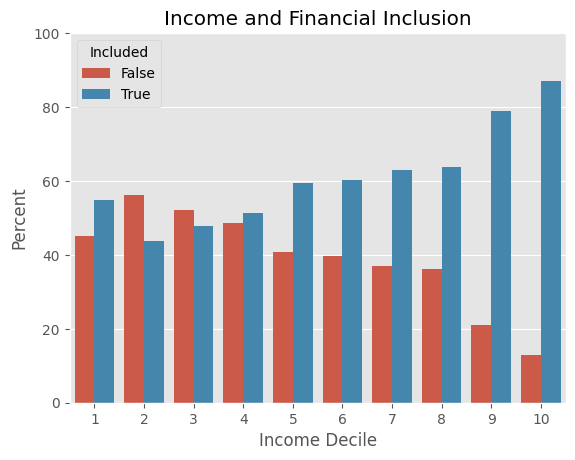

In [62]:
income_by_liquid = (100*pd.crosstab(df.income_decile, df.included, df.weight, aggfunc='sum', normalize='index')).reset_index()
income_by_liquid = income_by_liquid.melt(id_vars='income_decile', var_name='Included', value_name='Percent')

plt.title('Income and Financial Inclusion')
sns.barplot(income_by_liquid, x='income_decile', y='Percent', hue='Included')

plt.xlabel('Income Decile')

plt.ylim(0, 100);

## Financial Inclusion and Education
- This section studies the relationship between financial inclusion and education
- I find that households with higher levels of education are more likely to be included 

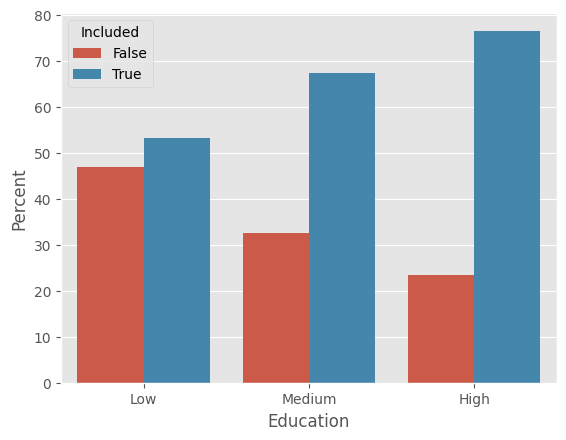

In [63]:
education_by_liquid = (100*pd.crosstab(df.education, df.included, df.weight, aggfunc='sum', normalize='index')).reset_index()
education_by_liquid = education_by_liquid.melt(id_vars='education', var_name='Included', value_name='Percent')

sns.barplot(education_by_liquid, x='education', y='Percent', hue='Included')
plt.xlabel('Education');

## Financial Inclusion and Age

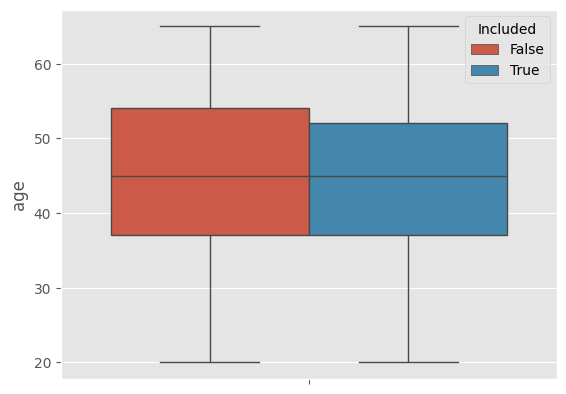

In [64]:
sns.boxplot(df, y='age', hue='included')
plt.legend(title='Included');

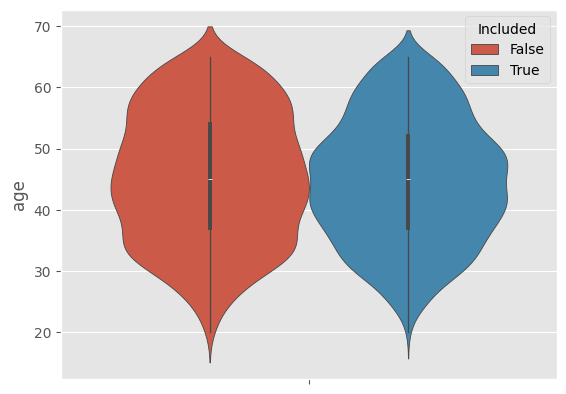

In [65]:
sns.violinplot(df, y='age', hue='included')
plt.legend(title='Included');

## Financial Inclusion and Location
- This section studies the relationship between financial inclusion and location
- The level of location is that state (entidad) that a household resides in
- I find financial inclusion varies significantly across states
- Baja California Sur and Guanajuato feature the highest level of financial inclusion, whereas Sonora and Nuevo Leon features the lowest level of financial inclusion

In [66]:
state_by_liquid = (100*pd.crosstab(df.state, df.included, df.weight, aggfunc='sum', normalize='index')).reset_index()
state_by_liquid = state_by_liquid.melt(id_vars='state', var_name='Included', value_name='Percent')
state_by_liquid = state_by_liquid.sort_values(['Included', 'Percent'], ascending=False)
state_by_liquid

,state,Included,Percent
16,Baja California Sur,True,83.104717
20,Guanajuato,True,74.647134
21,Jalisco,True,73.038605
19,Federal District,True,72.559593
18,Durango,True,71.569355
31,Yucatan,True,71.327888
27,Sinaloa,True,70.170839
17,Coahuila,True,68.439592
23,Morelos,True,62.880860
29,State of Mexico,True,57.365471


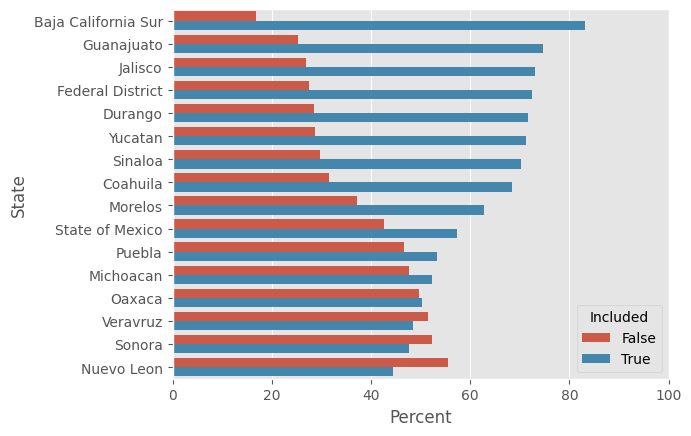

In [67]:
sns.barplot(state_by_liquid, x='Percent', y='state', hue='Included')
plt.ylabel('State')
plt.xlim(0, 100);

## Jobs and Financial Inclusion
- This section studies the relationship between financial inclusion and the job of the household head
- I find that financial inclusion varies significantly across industries
- Surprisingly, financial and insurance workers have one of the lowest levels of financial inclusion

In [68]:
naics = (100*pd.crosstab(df.naics, df.included, df.weight, aggfunc='sum', normalize='index')).reset_index()
naics = naics.sort_values(True, ascending=False)
naics = naics.melt(id_vars='naics', var_name='Included', value_name='Percent')
naics

,naics,Included,Percent
0,Information / Communications,False,11.935567
1,Professional / Scientific,False,17.132909
2,Utilities,False,17.698893
3,Government,False,22.741073
4,Mining,False,24.498485
5,Education,False,24.760063
6,Real Estate,False,25.596725
7,Cultural / Sport / Recreational,False,27.708882
8,Transportation,False,31.642468
9,Wholesale,False,31.930672


(0.0, 100.0)

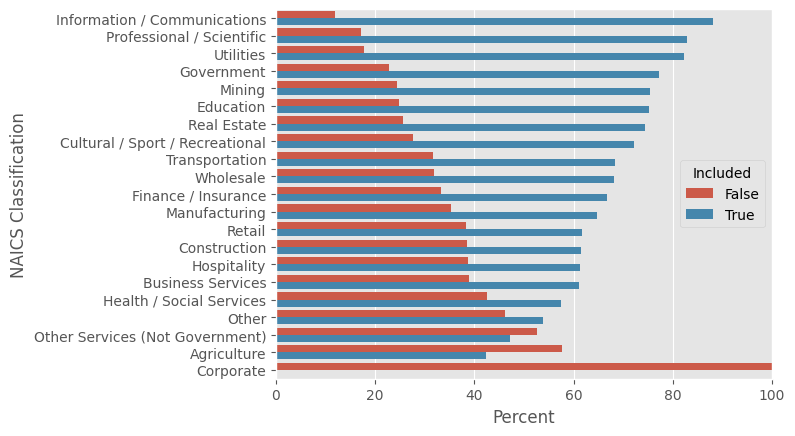

In [69]:
sns.barplot(naics, x='Percent', y='naics', hue='Included')
plt.ylabel('NAICS Classification')
plt.xlim(0, 100);

## Logistic Regression
- This section studies financial inclusion using a logistic regression
- This regression allows us to include our different variabels: income, education, location, industry, age, and sex
- Higher education increases the likelihood of financial inclusion
- Relative to households in the lowest income decile, income deciles 2 to 3 are less likely to be included, but deciles 5 - 10 are more likely to be included
- Why so? The lowest income households need to keep some savings, in case they fall on (harder) times.

In [89]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
df['included'] = df['included'].astype(int)

Y = 'included'
X = '~ C(income_decile) + C(education) + C(sex) + age + age_sq + C(state) + C(naics)'

logit = smf.glm(Y + X, df, freq_weights=df['weight']).fit()
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               included   No. Observations:                 3696
Model:                            GLM   Df Residuals:                 11789037
Model Family:                Gaussian   Df Model:                           49
Link Function:               Identity   Scale:                         0.20447
Method:                          IRLS   Log-Likelihood:            -7.3713e+06
Date:                Sun, 28 Jan 2024   Deviance:                   2.4105e+06
Time:                        11:33:47   Pearson chi2:                 2.41e+06
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      -0.0282      0.003    -10.980      0.000      -0.033      -0.023
C(income_decile)[T.2]                          -0.0707      0.001   -119.944      0.000      -0.072      -0.070
C(income_decile)[T.3]                          -0.0536      0.001    -88.595      0.000      -0.055      -0.052
C(income_decile)[T.4]                          -0.0309      0.001    -49.561      0.000      -0.032      -0.030
C(income_decile)[T.5]                          -0.0090      0.001    -15.488      0.000      -0.010      -0.008
C(income_decile)[T.6]                           0.0085      0.001     14.055      0.000       0.007       0.010
C(income_decile)[T.7]                           0.0144      0.001     22.679      0.000       0.013       0.016
C(income_decile)[T.8]                           0.0200      0.001     33.813      0.000       0.019       0.021
C(income_decile)[T.9]                           0.1561      0.001    251.464      0.000       0.155       0.157
C(income_decile)[T.10]                          0.2093      0.001    319.163      0.000       0.208       0.211
C(education)[T.Medium]                          0.0986      0.000    294.383      0.000       0.098       0.099
C(education)[T.High]                            0.0992      0.001    197.582      0.000       0.098       0.100
C(sex)[T.Male]                                  0.0677      0.000    195.249      0.000       0.067       0.068
C(state)[T.Coahuila]                           -0.1416      0.001   -141.908      0.000      -0.144      -0.140
C(state)[T.Durango]                            -0.0698      0.001    -64.547      0.000      -0.072      -0.068
C(state)[T.Federal District]                   -0.1467      0.001   -144.695      0.000      -0.149      -0.145
C(state)[T.Guanajuato]                         -0.0039      0.001     -3.900      0.000      -0.006      -0.002
C(state)[T.Jalisco]                            -0.0738      0.001    -81.240      0.000      -0.076      -0.072
C(state)[T.Michoacan]                          -0.2054      0.001   -217.336      0.000      -0.207      -0.204
C(state)[T.Morelos]                            -0.1630      0.001   -173.569      0.000      -0.165      -0.161
C(state)[T.Nuevo Leon]                         -0.3829      0.001   -385.623      0.000      -0.385      -0.381
C(state)[T.Oaxaca]                             -0.2731      0.001   -276.147      0.000      -0.275      -0.271
C(state)[T.Puebla]                             -0.2465      0.001   -255.041      0.000      -0.248      -0.245
C(state)[T.Sinaloa]                            -0.0883      0.001    -81.848      0.000      -0.090      -0.086
C(state)[T.Sonora]                             -0.2685     

### The Role of Age
- How does age impact financial inclusion?
- The overall effect is given by the sum of the linear and squared terms.
- We can see the effect is quadratic: initially, financial inclusion increases with age. 
- Later on, the effect of age peaks and a higher age makes a household less likely to be included.

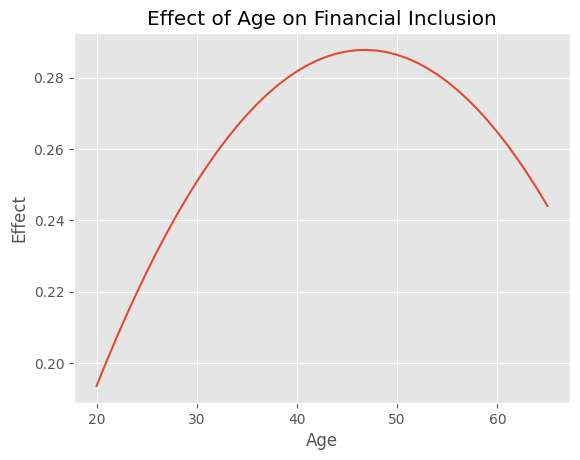

In [87]:
age = np.arange(df.age.min(), df.age.max()+1)
effect_of_age = logit.params['age']*age + logit.params['age_sq']*(age**2)

plt.plot(age, effect_of_age)
plt.xlabel('Age')
plt.ylabel('Effect')
plt.title('Effect of Age on Financial Inclusion');